In [124]:
import pandas as pd
import random

df = pd.read_csv('beers.csv')
ounce_to_ml = 29.574
sample_size = 300

beer_styles = df['style']
style_abundance = (beer_styles.value_counts(normalize=True) * 100).to_dict()


beers = df[['name', 'abv', 'ibu', 'ounces', 'style']].dropna()
beers['abv'] = round(100 * beers['abv'], 2)
beers['ounces'] *= ounce_to_ml
beers['ounces'] = beers['ounces'].astype('int')
beers['style'] = (beers['style'].apply(lambda x: style_abundance[x])).astype('float')
beers.columns = ['nazwa', 'procenty', 'ibu', 'ml', 'pospolitosc']
beers.reset_index(drop=True, inplace=True)
beers_sample = beers.sample(sample_size).reset_index(drop=True)
beers_sample['cena'] = [round(random.uniform(8, 20), 2) for _ in range(sample_size)]
beers_sample.head(10)

,nazwa,procenty,ibu,ml,pospolitosc,cena
0,Crabtree Oatmeal Stout,7.5,29.0,473,0.748441,16.07
1,Alpha Ale,5.1,45.0,354,10.187110,13.05
2,Sand Island Lighthouse,5.1,25.0,354,1.746362,19.71
3,Golden Road Hefeweizen (2012),4.6,15.0,473,1.663202,13.09
4,Helles Golden Lager,4.9,18.0,354,0.831601,13.59
5,Autumnation (2011-12) (2011),6.0,48.0,473,0.956341,13.73
6,Voodoo Love Child,9.2,25.0,354,0.457380,11.74
7,Lower De Boom,9.9,92.0,248,0.124740,14.71
8,1916 Shore Shiver,6.9,65.0,354,17.629938,19.07
9,TailGate Hefeweizen,4.9,28.0,709,1.663202,19.10


Jak to można skalować?

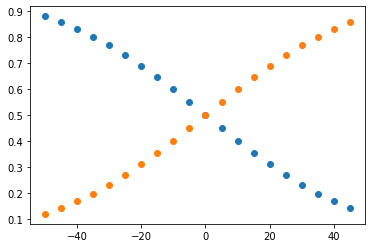

In [125]:
import matplotlib.pyplot as plt
import math

def min_sigmoid(x, center, std):
    return -1 / (1 + math.exp(-(x-center)/std)) + 1

def max_sigmoid(x, center, std):
    return 1 / (1 + math.exp(-(x-center)/std))

x = list(range(-50, 50, 5))
y = [min_sigmoid(e, center=0, std=25) for e in x]
y2 = [max_sigmoid(e, center=0, std=25) for e in x]
plt.plot(x, y, "o")
plt.plot(x, y2, "o")
plt.show()

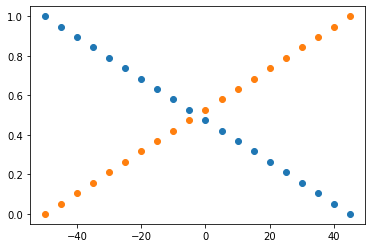

In [126]:
def min_max_scaler_rev(x_in):
    x = [-e for e in x_in]
    std = lambda X: (X - min(x)) / (max(x)- min(x))
    return [std(e) for e in x]

def min_max_scaler(x_in):
    x = x_in
    std = lambda X: (X - min(x)) / (max(x)- min(x))
    return [std(e) for e in x]

x = list(range(-50, 50, 5))
y = min_max_scaler(x)
y2 = min_max_scaler_rev(x)
plt.plot(x, y2, "o")
plt.plot(x, y, "o")
plt.show()

Przeskalowanie danych w pandasie

In [127]:
parameters = ["procenty", "ibu", "ml", "pospolitosc", "cena"]
parameter_types = ["max", "max", "max", "min", "min"]

for parameter, parameter_type in zip(parameters, parameter_types):
    scaler = min_max_scaler_rev if parameter_type == "max" else min_max_scaler
    x = beers_sample[parameter].tolist()
    scaled_x = scaler(x)
    beers_sample[parameter] = scaled_x

In [128]:
beers_sample.to_csv('piwa_kraftowe_5_kolumn.csv')

Wygenerowanie wersji 2, 3 i 4 parametrowych przez usunięcie kolejnych kolumn z wersji 5 parametrowej.

In [129]:
for i, column in enumerate(['pospolitosc', 'ibu', 'ml']):
    beers_sample.drop(labels=column, axis=1, inplace=True)
    beers_sample.to_csv(f'piwa_kraftowe_{4-i}_kolumn.csv')